In [489]:
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_mnist_pipeline.py')

C:\Users\icmems\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
C:\Users\icmems\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\icmems\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\icmems\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\icmems\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C

Generation 1 - Current best internal CV score: 0.9732122963809369


Generation 2 - Current best internal CV score: 0.9732122963809369


Generation 3 - Current best internal CV score: 0.9732122963809369


Generation 4 - Current best internal CV score: 0.9806450981359826


Generation 5 - Current best internal CV score: 0.9806450981359826



Best pipeline: RandomForestClassifier(KNeighborsClassifier(input_matrix, n_neighbors=9, p=2, weights=distance), bootstrap=True, criterion=gini, max_features=0.6000000000000001, min_samples_leaf=15, min_samples_split=20, n_estimators=100)
0.9866666666666667


True

In [2]:
ls

 磁碟區 C 中的磁碟沒有標籤。
 磁碟區序號:  8229-9EF4

 C:\Users\icmems\Desktop\score\各科成績標準一覽表 的目錄

2018/03/02  上午 10:05    <DIR>          .
2018/03/02  上午 10:05    <DIR>          ..
2018/03/02  上午 05:54    <DIR>          .ipynb_checkpoints
2018/02/27  上午 03:46            23,040 100SAT_stat_27.xls
2018/02/26  下午 08:42            36,352 106_individal_score.xls
2018/02/26  下午 08:39            36,352 107_individal_score.xls
2018/03/01  上午 07:49            44,544 27各科成績標準一覽表105~96.xls
2018/03/02  上午 10:05             4,637 PSO_GA.ipynb
2018/03/01  上午 06:15            14,207 total.xlsx
2018/03/02  上午 10:05             1,134 tpot_mnist_pipeline.py
2018/03/02  上午 06:03           388,718 Untitled.ipynb
               8 個檔案         548,984 位元組
               3 個目錄  31,639,281,664 位元組可用


In [3]:
%pycat tpot_mnist_pipeline.py

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Score on the training set was:0.9806450981359826
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=KNeighborsClassifier(n_neighbors=9, p=2, weights="distance")),
    RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.6000000000000001, min_samples_leaf=15, min_samples_split=20, n_estimators=100)
)



In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# Score on the training set was:0.9806450981359826
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=KNeighborsClassifier(n_neighbors=9, p=2, weights="distance")),
    RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.6000000000000001, min_samples_leaf=15, min_samples_split=20, n_estimators=100)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
print(results)

scores=exported_pipeline.score(X_test,y_test)
print(scores)

[5 2 6 1 2 7 8 8 2 1 4 8 5 5 2 9 5 7 2 6 3 8 9 2 2 6 1 8 7 2 0 8 1 7 8 7 9
 8 4 1 5 5 2 5 9 8 8 3 2 3 1 9 2 5 4 2 3 1 5 0 0 0 5 6 7 0 7 4 9 3 5 2 2 6
 7 0 3 3 2 1 6 0 9 4 0 3 8 9 6 5 1 1 2 2 8 7 2 9 4 1 8 2 3 1 2 4 2 0 6 1 0
 3 2 9 7 7 6 0 3 3 8 6 1 0 0 1 2 0 0 4 5 7 6 4 4 9 2 2 8 9 5 6 0 9 7 5 7 6
 9 5 5 2 3 3 8 3 4 4 2 7 9 5 7 9 6 4 9 1 4 4 1 4 3 4 5 0 5 7 1 2 2 8 3 1 5
 6 6 9 6 6 7 0 3 9 0 0 3 5 1 0 1 2 0 6 7 1 2 5 4 4 2 6 8 7 6 1 7 2 5 5 6 0
 4 7 5 5 4 1 4 6 9 0 9 7 4 5 5 9 0 1 3 8 6 2 6 4 5 4 7 7 5 5 8 8 6 0 5 2 6
 1 0 2 9 0 6 9 9 6 3 5 4 6 0 5 4 8 4 6 8 2 9 9 1 5 3 7 6 5 1 6 4 1 6 9 2 9
 9 3 1 4 9 3 7 8 2 7 5 3 3 7 0 1 2 7 4 7 6 0 1 0 4 7 9 9 6 6 7 8 7 9 1 1 0
 8 2 7 9 5 3 1 5 8 5 0 0 1 0 3 2 2 6 6 4 7 2 6 8 4 1 3 6 0 6 3 0 7 4 0 8 7
 2 1 3 1 3 3 8 7 7 6 7 8 3 9 1 3 3 8 8 8 8 9 1 6 9 3 5 6 4 9 1 3 7 6 8 1 8
 8 1 1 3 1 6 2 3 1 0 4 6 0 6 8 9 3 8 3 1 5 8 2 7 3 7 9 9 7 6 4 6 1 4 0 9 4
 8 5 8 9 1 7]
0.9866666666666667


In [358]:
def sphere(x):
    return (x**(2)).sum()

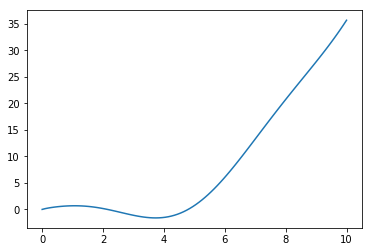

In [568]:
x=np.linspace(0,10,100)
plt.plot(x,x**2+2*np.sin(x)-2*x**1.5)

def fun(x):
    return x**2+2*np.sin(x)-2*x**1.5

In [569]:
min(x**2+2*np.sin(x)-2*x**1.5)

-1.6047457905471294

In [553]:
def fun2(x):
    return sum(x**2+2*np.sin(x)-2*x**1.5+1)#.reshape(-1,)

In [561]:
def fun2(x):
    return (x**2+2*np.sin(x)-2*x**1.5+1).sum()

In [562]:
fun2(np.array([[0,1,2,3]])) #fun2(np.array([[0,1,2,3]]))

3.734617744481247

In [560]:
fun2(np.array([[0,1,2,3]])) #sum(x**2+2*np.sin(x)-2*x**1.5+1)

array([ 1.        ,  1.68294197,  1.1617406 , -0.11006483])

In [556]:
fun2(np.array([[0,1,2,3]])) #if fun2 without sum

array([[ 1.        ,  1.68294197,  1.1617406 , -0.11006483]])

In [544]:
sum(x**2+2*np.sin(x)-2*x**1.5)

849.7820765902404

In [513]:
(x**2+2*np.sin(x)-2*x**1.5).sum()

849.7820765902404

In [540]:
x.shape

(100,)

In [518]:
fun2(x)

849.7820765902404

In [33]:
# Initialization
empty_particle={}
best={}

Position=[]
cost=[]
velocity=[]

best.update({'Position':Position,'cost':cost})
empty_particle.update({'Position':[],'cost':[],'velocity':[],'best':best})


In [85]:
print(empty_particle)
print(best)

{'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': []}}
{'Position': [], 'cost': []}


In [88]:
np.tile(empty_particle,(2,))[0]['best']

{'Position': [], 'cost': []}

In [181]:
empty_particle['best']['cost']=np.zeros((1,3))
empty_particle

{'Position': array([[0., 0., 0.]]),
 'best': {'Position': [], 'cost': array([[0., 0., 0.]])},
 'cost': [],
 'velocity': []}

In [67]:
temp=np.zeros(shape=(1,5))
temp2= np.tile([1],(1,5))

print(temp)
#print(temp2)


#for i in range(len(temp)):
#    #temp = temp + temp2
#    print(i)
#
#len(temp)

0.0


In [222]:
sphere(np.array([[ 0.63863986, -0.68099012, -0.87157116]])).sum()

1.6312447012621796

In [225]:
np.array([[0.83585283, 0.22482823, 0.53232209]])-np.array([[0.83585283, 0.22482823, 0.53232209]])

array([[0., 0., 0.]])

In [188]:
np.array([[0., 0., 0.]])*1+ 1.5*np.random.random((1,3))*(np.array([[ 0.10220843,  0.97049644, -0.25285742]])-np.array([[ 0.10220843,  0.97049644, -0.25285742]]))

array([[0., 0., 0.]])

In [193]:
np.random.random((1,3))*1.5*(np.array([[ 0.10220843,  0.97049644, -0.25285742]]))

array([[ 0.14764262,  0.80793289, -0.05876793]])

In [195]:
np.array([1,2])*np.array([2,3])

array([2, 6])

In [159]:
print(type(np.random.uniform(-1,1,size=(1,3))))

<class 'numpy.ndarray'>


In [168]:
np.random.uniform(-1,1,size=(1,2))

array([[-0.06403444,  0.77041031]])

In [144]:
np.array([[ 0.90340023,  0.35946207, -0.11004333]]).shape

(1, 3)

In [336]:
empty_particle \
= [{'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': []}},
 {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': []}},
 {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': []}},
 {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': []}},
 {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': []}}]

In [341]:
empty_particle[0]['best']

{'Position': [], 'cost': []}

In [366]:
for i in range(5):
    empty_particle[i]['cost']=(123*i)
    empty_particle[i]['Position']=(1*i)

In [367]:
empty_particle

[{'Position': 0,
  'best': {'Position': [], 'cost': []},
  'cost': 0,
  'velocity': []},
 {'Position': 1,
  'best': {'Position': [], 'cost': []},
  'cost': 123,
  'velocity': []},
 {'Position': 2,
  'best': {'Position': [], 'cost': []},
  'cost': 246,
  'velocity': []},
 {'Position': 3,
  'best': {'Position': [], 'cost': []},
  'cost': 369,
  'velocity': []},
 {'Position': 4,
  'best': {'Position': [], 'cost': []},
  'cost': 492,
  'velocity': []}]

In [350]:
np.array([[-0.61039629,  0.93426595,  0.19190323]]).shape

(1, 3)

In [354]:
np.array([[-0.61039629,  0.93426595,  0.19190323]])**2

array([[0.37258363, 0.87285287, 0.03682685]])

In [356]:
sum([1,2,3])

6

In [357]:
[1,2,3].sum()

AttributeError: 'list' object has no attribute 'sum'

In [355]:
sum(np.array([[-0.61039629,  0.93426595,  0.19190323]]))

array([-0.61039629,  0.93426595,  0.19190323])

In [353]:
np.array([[-0.61039629,  0.93426595,  0.19190323]]).sum()

0.51577289

In [359]:
sphere(np.array([[-0.61039629,  0.93426595,  0.19190323]]))

1.2822633458595993

In [416]:
test_particle={}
test_particle.update({'Position':[],'cost':[],'velocity':[],'best':best})


#test_particle['cost']=np.random.random()
#test_particle['Position']=np.random.random()

# Repeat copies of array
particle=np.tile(test_particle,(5,))
particle

array([{'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}},
       {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}},
       {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}},
       {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}},
       {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}],
      dtype=object)

In [423]:
test_particle={}
test_particle.update({'Position':[],'cost':[],'velocity':[],'best':best})
particle=[]

#test_particle['cost']=np.random.random()
#test_particle['Position']=np.random.random()

# Repeat copies of array
for i in range(5):
    particle.append(test_particle.copy())
particle

[{'Position': [],
  'best': {'Position': [], 'cost': array([[0., 0., 0.]])},
  'cost': [],
  'velocity': []},
 {'Position': [],
  'best': {'Position': [], 'cost': array([[0., 0., 0.]])},
  'cost': [],
  'velocity': []},
 {'Position': [],
  'best': {'Position': [], 'cost': array([[0., 0., 0.]])},
  'cost': [],
  'velocity': []},
 {'Position': [],
  'best': {'Position': [], 'cost': array([[0., 0., 0.]])},
  'cost': [],
  'velocity': []},
 {'Position': [],
  'best': {'Position': [], 'cost': array([[0., 0., 0.]])},
  'cost': [],
  'velocity': []}]

In [421]:
particle

AttributeError: 'list' object has no attribute 'shape'

In [418]:
particle[0]['cost']=np.random.random()
particle[0]['Position']=np.random.random()
print(particle[0]['cost'])
print(particle[1]['Position'])
print(particle)
print('------------')
#particle[1]['cost']=np.random.random()
#particle[1]['Position']=np.random.random()
#print(particle[2]['cost'])
#print(particle[3]['Position'])
print('------------')
print(particle)

0.8923571053707998
0.881048265188984
[{'Position': 0.881048265188984, 'cost': 0.8923571053707998, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}
 {'Position': 0.881048265188984, 'cost': 0.8923571053707998, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}
 {'Position': 0.881048265188984, 'cost': 0.8923571053707998, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}
 {'Position': 0.881048265188984, 'cost': 0.8923571053707998, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}
 {'Position': 0.881048265188984, 'cost': 0.8923571053707998, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}]
------------
------------
[{'Position': 0.881048265188984, 'cost': 0.8923571053707998, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}
 {'Position': 0.881048265188984, 'cost': 0.8923571053707998, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}

In [404]:
particle=
particle[0]['cost']=np.random.random()
particle[0]['Position']=np.random.random()
print(particle[0]['cost'])
print(particle[0]['Position'])
print('------------')
particle[1]['cost']=np.random.random()
particle[1]['Position']=np.random.random()
print(particle[1]['cost'])
print(particle[1]['Position'])
print('------------')
print(particle)

IndexError: index 5 is out of bounds for axis 0 with size 5

In [424]:
print(np.array(particle))
print(np.array(particle).shape)

[{'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}
 {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}
 {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}
 {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}
 {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}]
(5,)


In [398]:
particle

array([{'Position': 0.25106061535629043, 'cost': 0.9387438887406816, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}},
       {'Position': 0.25106061535629043, 'cost': 0.9387438887406816, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}},
       {'Position': 0.25106061535629043, 'cost': 0.9387438887406816, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}},
       {'Position': 0.25106061535629043, 'cost': 0.9387438887406816, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}},
       {'Position': 0.25106061535629043, 'cost': 0.9387438887406816, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}],
      dtype=object)

In [ ]:

for i in range(2):
    particle[i]['cost']=np.random.random()
    particle[i]['Position']=np.random.random()
    print(particle[i])
    print(i)
    print(particle)
    print('-------')
    
particle

In [425]:

for i in range(5):
    particle[i]['cost']=np.random.random()
    particle[i]['Position']=np.random.random()
    print(particle[i])
    print(i)
    print(particle)
    print('-------')
    
particle

{'Position': 0.2518224267633803, 'cost': 0.31236958533360093, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}
0
[{'Position': 0.2518224267633803, 'cost': 0.31236958533360093, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}, {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}, {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}, {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}, {'Position': [], 'cost': [], 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}]
-------
{'Position': 0.9972690529043281, 'cost': 0.23187826024930625, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}
1
[{'Position': 0.2518224267633803, 'cost': 0.31236958533360093, 'velocity': [], 'best': {'Position': [], 'cost': array([[0., 0., 0.]])}}, {'Position': 0.9972690529043281,

[{'Position': 0.2518224267633803,
  'best': {'Position': [], 'cost': array([[0., 0., 0.]])},
  'cost': 0.31236958533360093,
  'velocity': []},
 {'Position': 0.9972690529043281,
  'best': {'Position': [], 'cost': array([[0., 0., 0.]])},
  'cost': 0.23187826024930625,
  'velocity': []},
 {'Position': 0.01520425226230504,
  'best': {'Position': [], 'cost': array([[0., 0., 0.]])},
  'cost': 0.6982031507922648,
  'velocity': []},
 {'Position': 0.4178409068906689,
  'best': {'Position': [], 'cost': array([[0., 0., 0.]])},
  'cost': 0.7345123325505366,
  'velocity': []},
 {'Position': 0.30596906287800396,
  'best': {'Position': [], 'cost': array([[0., 0., 0.]])},
  'cost': 0.6604642801736658,
  'velocity': []}]

In [541]:
fun2(np.array([-0.50395551,  2.97566172, -0.23960787]))

C:\Users\icmems\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


array([nan])

In [526]:
np.linspace(1,2,10).shape

(10,)

In [563]:
fun2(np.array([[0.4899572 , 4.54166367, 4.45447864]]))

1.8990766337110436

In [542]:
(np.random.uniform(-1,1,size=(1,3)))

array([[-0.58184492,  0.50137197,  0.78852473]])

empty particle
: []


C:\Users\icmems\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


{'Position': array([[-0.88727844,  0.50168747,  2.97718413]]), 'cost': nan, 'velocity': array([[0., 0., 0.]]), 'best': {'Position': [], 'cost': []}}
{'Position': array([[-0.88727844,  0.50168747,  2.97718413]]), 'cost': nan, 'velocity': array([[0., 0., 0.]]), 'best': {'Position': array([[-0.88727844,  0.50168747,  2.97718413]]), 'cost': nan}}


{'Position': array([[2.66794629, 1.43329293, 0.54577102]]), 'cost': 3.447837436654265, 'velocity': array([[0., 0., 0.]]), 'best': {'Position': array([[-0.88727844,  0.50168747,  2.97718413]]), 'cost': nan}}
{'Position': array([[2.66794629, 1.43329293, 0.54577102]]), 'cost': 3.447837436654265, 'velocity': array([[0., 0., 0.]]), 'best': {'Position': array([[2.66794629, 1.43329293, 0.54577102]]), 'cost': 3.447837436654265}}


{'Position': array([[0.08865702, 4.7273759 , 1.72669458]]), 'cost': 3.3427677673111638, 'velocity': array([[0., 0., 0.]]), 'best': {'Position': array([[2.66794629, 1.43329293, 0.54577102]]), 'cost': 3.447837436654265}}
{'Posit

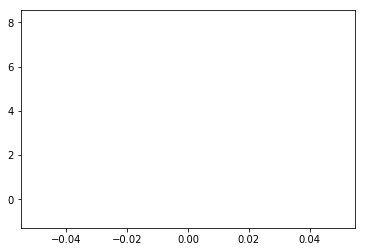

In [570]:
pso(fun2,3,-1,6,10,100,True)

empty particle
: []
{'Position': array([[-0.56005545, -0.3810341 , -0.214901  ]]), 'cost': 0.5050315332083514, 'velocity': array([[0., 0., 0.]]), 'best': {'Position': array([[-0.56005545, -0.3810341 , -0.214901  ]]), 'cost': 0.5050315332083514}}


{'Position': array([[0.55308399, 0.65384374, 0.40340195]]), 'cost': 0.89614665939452, 'velocity': array([[0., 0., 0.]]), 'best': {'Position': array([[0.55308399, 0.65384374, 0.40340195]]), 'cost': 0.89614665939452}}


{'Position': array([[ 0.42611357, -0.697931  ,  0.14988635]]), 'cost': 0.6911463805659042, 'velocity': array([[0., 0., 0.]]), 'best': {'Position': array([[ 0.42611357, -0.697931  ,  0.14988635]]), 'cost': 0.6911463805659042}}


{'Position': array([[ 0.75269262, -0.69538606, -0.34360309]]), 'cost': 1.1681710416856597, 'velocity': array([[0., 0., 0.]]), 'best': {'Position': array([[ 0.75269262, -0.69538606, -0.34360309]]), 'cost': 1.1681710416856597}}


{'Position': array([[ 0.7644507 ,  0.35160138, -0.78797758]]), 'cost': 1.32891

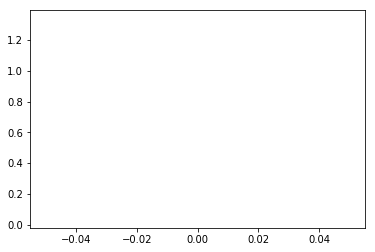

In [510]:
pso(sphere,3,-1,1,4,5,True)

In [441]:
'global best cost :\n %s'%123

'global best cost :\n 123'

In [443]:
print('global best cost : \n %s'%123)

global best cost : 
 123


In [516]:
# define pso function

def pso(costfunction,nvar,varmax,varmin,maxiter,nPop,constri_coeff):
    
    # nPop: Population Size (Swarm Size)
    
    # nvar: Number of Decision Variables (search space)
    # each decision variable is the each particle's location
    # type : tuple
    varsize=(1,nvar)
    
    if constri_coeff:
        #Constriction Coefficients
        phi1=2.05
        phi2=2.05
        phi=phi1+phi2
        chi=2/(phi-2+np.sqrt(phi**2-4*phi))
        w=chi         
        wdamp=1       
        c1=chi*phi1   
        c2=chi*phi2   
    else:
        w=1            # Inertia Weight
        wdamp=0.99     # Inertia Weight Damping Ratio
        c1=1.5         # Personal Learning Coefficient
        c2=2.0         # Global Learning Coefficient
    
    # Velocity Limits
    VelMax=0.1*(varmax-varmin)
    VelMin= -VelMax
    
    # Initialization
    empty_particle={}
    best={}
    
    # only one! 沒有每一個particle都有，整體只有一個
    # set initial global best to infinite
    Globalbest={'gcost':np.inf,'gposition':None}
    
    Position=[]
    cost=[]
    velocity=[]
    particle=[]
    best.update({'Position':Position,'cost':cost})
    
    empty_particle.update({'Position':[],'cost':[],'velocity':[],'best':best})
    
    print('empty particle\n: %s'%particle)
    
    #initialize population's position , velocity , evaluation
    
    for i in range(nPop):
        
        particle.append(empty_particle.copy())
        
        # initialize position
        particle[i]['Position']= np.random.uniform(varmin,varmax,size=varsize)       
        
        # initialize velocity
        particle[i]['velocity']=np.zeros(varsize)
        
        # evaluation
        particle[i]['cost']= costfunction(particle[i]['Position'])
        
        print(particle[i])
        
        # update personal best
        particle[i]['best']['Position']= particle[i]['Position'].copy()
        particle[i]['best']['cost']=particle[i]['cost'].copy()
        
        # update global best
        if (particle[i]['best']['cost']) <Globalbest['gcost']:
            Globalbest['gcost'] = (particle[i]['best']['cost'].copy())
            Globalbest['gposition'] = (particle[i]['best']['Position'].copy())

        print(particle[i])
        print('\n')
        
    print('After initialization:\n%s'%particle)

    bestcost=[]
    
    for it in range(maxiter):
        
        for i in range(0, nPop):
            
            ## update velocity
            
            particle[i]['velocity'] = w*particle[i]['velocity'] +\
                        c1*np.random.random(varsize)*(particle[i]['best']['Position']-particle[i]['Position'])+\
                        c2*np.random.random(varsize)*(Globalbest['gposition']-particle[i]['Position'])
            
            # Apply Velocity Limits
            particle[i]['velocity']=np.maximum(particle[i]['velocity'],VelMin)
            particle[i]['velocity']=np.minimum(particle[i]['velocity'],VelMax)
            
            # Update Position
            
            particle[i]['Position'] += particle[i]['velocity']
            
            # Evaluation
            
            particle[i]['cost'] = costfunction(particle[i]['Position'])
            
            # Update Personal Best
            
            #print('cost:%s'%particle[i]['cost'])
            #print('total cost:%s'%particle[i]['best']['cost'])
            plt.plot(particle[i]['best']['cost'],color='r')
            
            if  particle[i]['cost'] < particle[i]['best']['cost']:
                
                print('Personal cost:%s'%particle[i]['cost']+', Global best cost:%s'%particle[i]['best']['cost'])
                
                particle[i]['best']['Position'] = particle[i]['Position'].copy()
                particle[i]['best']['cost'] = particle[i]['cost'].copy()
                
                # Update Global Best
                
                if particle[i]['best']['cost'].sum()<Globalbest['gcost']:
                    
                    Globalbest['gcost']=particle[i]['best']['cost'].copy()
                    Globalbest['gposition']=particle[i]['best']['Position'].copy()
        
        print('\n %s'%particle)
        bestcost.append(Globalbest)
        
        w=w*wdamp
    
    return print('\n global best cost :\n %s '%Globalbest['gcost']+',\n\n global best location :\n %s'%Globalbest['gposition']+',\n\n bestcost :\n %s'%bestcost)

In [205]:
# define pso function

def pso(costfunction,nvar,varmax,varmin,maxiter,nPop,constri_coeff):
    
    # type : tuple
    varsize=(1,nvar)
    
    if constri_coeff:
        #Constriction Coefficients
        phi1=2.05
        phi2=2.05
        phi=phi1+phi2
        chi=2/(phi-2+np.sqrt(phi**2-4*phi))
        w=chi         
        wdamp=1       
        c1=chi*phi1   
        c2=chi*phi2   
    else:
        w=1            # Inertia Weight
        wdamp=0.99     # Inertia Weight Damping Ratio
        c1=1.5         # Personal Learning Coefficient
        c2=2.0         # Global Learning Coefficient
    
    # Velocity Limits
    VelMax=0.1*(varmax-varmin)
    VelMin= -VelMax
    
    # Initialization
    empty_particle={}
    best={}
    #Globalbest={}
    
    Position=[]
    cost=[]
    velocity=[]
    
    best.update({'Position':Position,'cost':cost})
    empty_particle.update({'Position':[],'cost':[],'velocity':[],'best':best})
    #Globalbest.update('best':best)
    
    # Repeat copies of array
    particle=np.tile(empty_particle,(nPop,))
    print(particle)
    print('----------------------')
    # set initial global best to infinite
    
    Globalbest=np.inf
    
    #initialize position , velocity , evaluation
    
    for i in range(nPop):
        
        # initialize position
        particle[i]['Position']= np.random.uniform(varmin,varmax,size=varsize)
        #print(np.random.uniform(varmin,varmax,size=varsize))
        
        
        # initialize velocity
        particle[i]['velocity']=np.zeros(varsize)
        print(particle[i]['velocity'])
        
        # evaluation
        particle[i]['cost']=costfunction(particle[i]['Position'])
        #print(particle)
        
        # update personal best
        particle[i]['best']['Position']=particle[i]['Position']
        particle[i]['best']['cost']=particle[i]['cost']
        
        #print(particle[i]['best']['cost'])
        
        # update global best
        if (particle[i]['best']['cost']).any() <Globalbest:
            Globalbest = (particle[i]['best']['cost']).any()
    
    print(particle)
    bestcost=np.zeros(shape=(maxiter,1))
    
    for i in range(maxiter):
        
        ## update velocity
        #particle[i]['velocity'] =w*particle[i]['velocity'] +\
        #c1*np.random.random(varsize)*(particle[i]['best']['Position']-particle[i]['Position'])+\
        #c2*np.random.random(varsize)*(Globalbest[i]['best']['Position']-particle[i]['Position'])
        
        # Apply Velocity Limits
        particle[i]['velocity']=max(particle[i]['velocity'],VelMin)
        particle[i]['velocity']=min(particle[i]['velocity'].any(),VelMax)
        
        # Update Position
        
        particle[i]['Position'] = particle[i]['Position'] + particle[i]['velocity']
        
        # Evaluation
        
        particle[i]['cost'] =costfunction(particle[i]['Position'])
        
        # Update Personal Best
        
        if  particle[i]['cost'] < particle[i]['best']['cost']:
            
            particle[i]['best']['position'] = particle[i]['Position']
            particle[i]['best']['cost'] = particle[i]['cost']
            
            if particle[i]['best']['cost']<Globalbest:
                
                Globalbest=particle[i]['best']['cost']
            
        bestcost[i]=Globalbest
        
        w=w*wdamp
    
    Bestsol = Globalbest

In [310]:
sum(a)


5

In [266]:
a=[]
a.append(2)
a.append(3)
a

[2, 3]

In [214]:
'global best cost : %s'%12+',%s'%24

'global best cost : 12,24'

In [205]:
# define pso function

def pso(costfunction,nvar,varmax,varmin,maxiter,nPop,constri_coeff):
    
    # type : tuple
    varsize=(1,nvar)
    
    if constri_coeff:
        #Constriction Coefficients
        phi1=2.05
        phi2=2.05
        phi=phi1+phi2
        chi=2/(phi-2+np.sqrt(phi**2-4*phi))
        w=chi         
        wdamp=1       
        c1=chi*phi1   
        c2=chi*phi2   
    else:
        w=1            # Inertia Weight
        wdamp=0.99     # Inertia Weight Damping Ratio
        c1=1.5         # Personal Learning Coefficient
        c2=2.0         # Global Learning Coefficient
    
    # Velocity Limits
    VelMax=0.1*(varmax-varmin)
    VelMin= -VelMax
    
    # Initialization
    empty_particle={}
    best={}
    #Globalbest={}
    
    Position=[]
    cost=[]
    velocity=[]
    
    best.update({'Position':Position,'cost':cost})
    empty_particle.update({'Position':[],'cost':[],'velocity':[],'best':best})
    #Globalbest.update('best':best)
    
    # Repeat copies of array
    particle=np.tile(empty_particle,(nPop,))
    print(particle)
    print('----------------------')
    # set initial global best to infinite
    
    Globalbest=np.inf
    
    #initialize position , velocity , evaluation
    
    for i in range(nPop):
        
        # initialize position
        particle[i]['Position']= np.random.uniform(varmin,varmax,size=varsize)
        #print(np.random.uniform(varmin,varmax,size=varsize))
        
        
        # initialize velocity
        particle[i]['velocity']=np.zeros(varsize)
        print(particle[i]['velocity'])
        
        # evaluation
        particle[i]['cost']=costfunction(particle[i]['Position'])
        #print(particle)
        
        # update personal best
        particle[i]['best']['Position']=particle[i]['Position']
        particle[i]['best']['cost']=particle[i]['cost']
        
        #print(particle[i]['best']['cost'])
        
        # update global best
        if (particle[i]['best']['cost']).any() <Globalbest:
            Globalbest = (particle[i]['best']['cost']).any()
    
    print(particle)
    bestcost=np.zeros(shape=(maxiter,1))
    
    for i in range(maxiter):
        
        ## update velocity
        #particle[i]['velocity'] =w*particle[i]['velocity'] +\
        #c1*np.random.random(varsize)*(particle[i]['best']['Position']-particle[i]['Position'])+\
        #c2*np.random.random(varsize)*(Globalbest[i]['best']['Position']-particle[i]['Position'])
        
        # Apply Velocity Limits
        particle[i]['velocity']=max(particle[i]['velocity'],VelMin)
        particle[i]['velocity']=min(particle[i]['velocity'].any(),VelMax)
        
        # Update Position
        
        particle[i]['Position'] = particle[i]['Position'] + particle[i]['velocity']
        
        # Evaluation
        
        particle[i]['cost'] =costfunction(particle[i]['Position'])
        
        # Update Personal Best
        
        if  particle[i]['cost'] < particle[i]['best']['cost']:
            
            particle[i]['best']['position'] = particle[i]['Position']
            particle[i]['best']['cost'] = particle[i]['cost']
            
            if particle[i]['best']['cost']<Globalbest:
                
                Globalbest=particle[i]['best']['cost']
            
        bestcost[i]=Globalbest
        
        w=w*wdamp
    
    Bestsol = Globalbest